## Logistic Regression
by Carl Shan and Jen Selby at The Nueva School

This notebook will demonstrate some code that uses sklearn's Logistic Regression model to classify some data.

# Learning about Logistic Regression

Logistic Regression is a common classification technique.

Unlike linear regression, which predicts numerical outcomes, logistic regression outputs a number that is meant to represent the probability of a certain classification.

Steps to learn about logistic regression:

1. First, [watch this 15-minute video](https://www.youtube.com/embed/-Z2a_mzl9LM?feature=oembed&rel=0). It does a great job of breaking down in simple terms the intuition and math behind logistic regression.

2. Then to read more about the model, check out [the content on the course notes](https://jennselby.github.io/MachineLearningCourseNotes/)

3. Finally you can read more about Logisitic Regression in Python by following [this online guide.](https://www.linkedin.com/pulse/logistics-regression-using-ipython-jeffrey-strickland-ph-d-cmsp)

## Instructions

1. Read through the code below to make sure you understand it.
2. Then, go to Canvas and pick a set of exercises (Standard or Advanced) to complete and submit.

The rest of this notebook walks you through an example of using the logistic regression model.

In this Jupyter Notebook, you will see the code behind how to build a logistic model to predict whether a plant is of Class A (tall and thin) or Class B (short and wide).

### Step 1: Importing the libraries we need

In [2]:
# Remember that you can run this cell with SHIFT+ENTER
import numpy.random
from sklearn import linear_model
import matplotlib.pyplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Step 2: Generating some fake data about plants we're going to use to classify

In [13]:
################################################################################
#  GENERATED DATA
################################################################################

# We have two types of plants
# Plant A tends to be taller (avg 60cm) and thinner (avg 8cm)
# Plant B tends to be shorter (avg 58cm) and wider (avg 10cm)
# We'll use 0 for Plant A and 1 for Plant B

NUM_INPUTS = 50
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0
PLANT_C_AVG_HEIGHT = 63.0
PLANT_C_AVG_WIDTH = 6.0

plantA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plantA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plantB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plantB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

plantC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plantC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

plant_inputs = list(zip(numpy.append(plantA_heights, plantB_heights), numpy.append(plantA_widths, plantB_widths)))

plant_inputs2 = list(zip(numpy.append(numpy.append(plantA_heights, plantB_heights), plantC_heights), numpy.append(numpy.append(plantA_widths, plantB_widths), plantC_widths)))
        
types = [0]*NUM_INPUTS + [1]*NUM_INPUTS

typesA = [0]*NUM_INPUTS + [1]*NUM_INPUTS*2

typesB = [1]*NUM_INPUTS + [0]*NUM_INPUTS + [1]*NUM_INPUTS

typesC = [1]*NUM_INPUTS*2 + [0]*NUM_INPUTS

### Step 3: Plotting the data

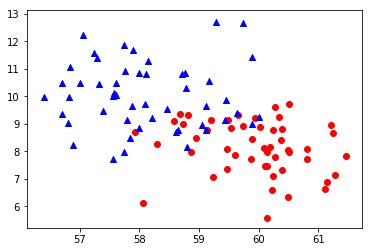

In [14]:
################################################################################
# PLOT
################################################################################

# put the generated points on the graph
matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")

matplotlib.pyplot.show()


The red dots are Class A, and the blue dots are Class B.

There is a pretty obvious split between the two. So can we build a model that can accurately distinguish a new plant, given that we know its height and width, whether it's of Class A or Class B?

**Note**: Before going onto the next step, I highly encourage you to run the above cell (SHIFT+ENTER) and then make a few cells below to inspect what each of the variables (e.g., `plantA_heights`, `plant_inputs`) look like.

The reason is that you generally want to know what your data looks like before you start modeling.

For example, do you know how many rows of data there are? Are the data of type `int` or `float`? Are they in a single `list` or `lists` within a `list`? All of these can make a difference as you go on to build a logistic model.

### Step 4: Fitting a model to our data

Again, notice that by using the `sklearn` library, it takes very few lines of code to fit the model to the data.

Intercept: [0.25931974]  Coefficients: [[-0.28237171  1.81686155]]


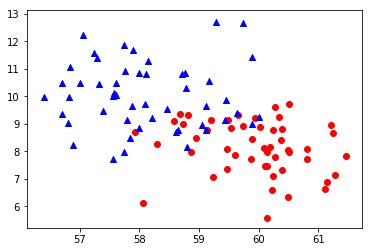

In [15]:
################################################################################
# MODEL TRAINING
################################################################################

model = linear_model.LogisticRegression()
model.fit(plant_inputs, types)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")

matplotlib.pyplot.show()

### Step 5: Using our fitted model to make predictions on new data 

In [2]:
################################################################################
# PREDICTION
################################################################################

newA_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
newA_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
newB_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
newB_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)

inputs = [[newA_height, newA_width], [newB_height, newB_width]]

print('Type predictions: {0}'.format(model.predict(inputs)))
print('Probabilities: {0}'.format(model.)))

SyntaxError: invalid syntax (<ipython-input-2-f2f202641f49>, line 13)

# Advanced Option 1

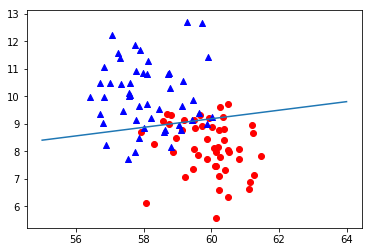

In [18]:
# Right now, the graph shows the generated data but nothing about the model fit. How might you try to assess
# model fit graphically? E.g., how could you visually figure out if the predictions you're generating are
# actually "accurate" or "right"? 

matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")

xVals = []
yVals = []
for i in range (55, 65):
    xVals.append(i)
    y = -(i*model.coef_[0][0]+model.intercept_)/model.coef_[0][1]
    yVals.append(y)

matplotlib.pyplot.plot(xVals, yVals)
matplotlib.pyplot.show()

# Advanced Option 2

[array([[0.32474838, 0.67525162],
       [0.35216508, 0.64783492],
       [0.31299098, 0.68700902]]), array([[1.67317971e-02, 9.83268203e-01],
       [9.60331441e-01, 3.96685589e-02],
       [3.33147396e-04, 9.99666853e-01]]), array([[4.39595289e-01, 5.60404711e-01],
       [5.45043883e-04, 9.99454956e-01],
       [9.77111622e-01, 2.28883776e-02]])]


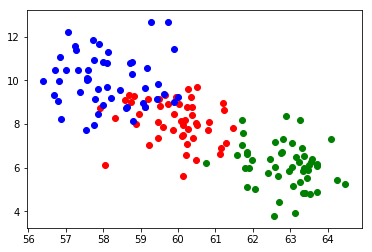

In [19]:
# If you have more than two classes (e.g., what if there was a third plant type? or a fourth?), you can
# use Multinomial Logistic Regression (in fact, this is built into scikit-learn's logistic regression function).
# One way to implement this is to use one vs. rest, that is to use a binomial logistic regression for each class
# that you have, to decide if it is or is not in that class. Try expanding the program in this way, with a third
# type. Submit your Jupyter Notebook or .py file.

modelA = linear_model.LogisticRegression()
modelA.fit(plant_inputs2, typesA)

modelB = linear_model.LogisticRegression()
modelB.fit(plant_inputs2, typesB)

modelC = linear_model.LogisticRegression()
modelC.fit(plant_inputs2, typesC)

newA_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
newA_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
newB_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
newB_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)
newC_height = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT)
newC_width = numpy.random.normal(loc=PLANT_C_AVG_WIDTH)

inputs = [[newA_height, newA_width], [newB_height, newB_width], [newC_height, newC_width]]

a = [modelA.predict_proba(inputs), modelB.predict_proba(inputs), modelC.predict_proba(inputs)]
print(a)
matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="o")
matplotlib.pyplot.scatter(plantC_heights, plantC_widths, c="green", marker="o")

matplotlib.pyplot.show()